In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import F5Utils

In [40]:
file = "../somedata/umi10000bins/batch0.fast5"
n = next(F5Utils.getReads(file))
read = [str(n[0]),n[1]] # unwrap tuple
read[1] = read[1][580:]

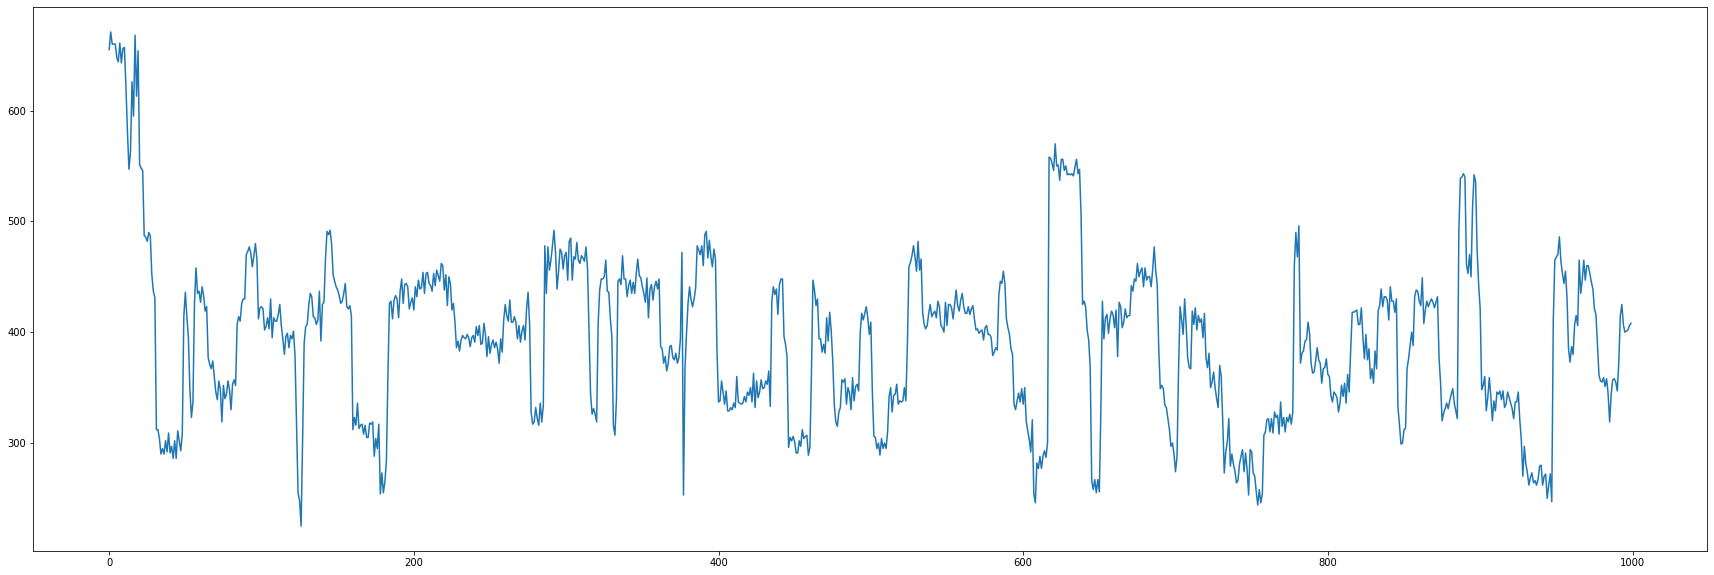

In [41]:
plt.figure(figsize=(30,10))
plt.plot(read[1][:1000])

In [42]:
DNAdata = read[0].split("\\n")[1]
print(len(DNAdata))
len(DNAdata.split('AAAAAA')[0])

4306


2675

In [43]:
mapper = {
    "T": 300,
    "C": 400,
    "A": 500,
    "G": 600
}
mD = list(map(lambda x: mapper[x], DNAdata))
print(mD[:5])
ratio = len(read[1])/len(mD)
rr = list(map(lambda x: x*ratio,range(len(mD))))
print(rr[:5])

[400, 600, 500, 300, 600]
[0.0, 11.12354853692522, 22.24709707385044, 33.37064561077566, 44.49419414770088]


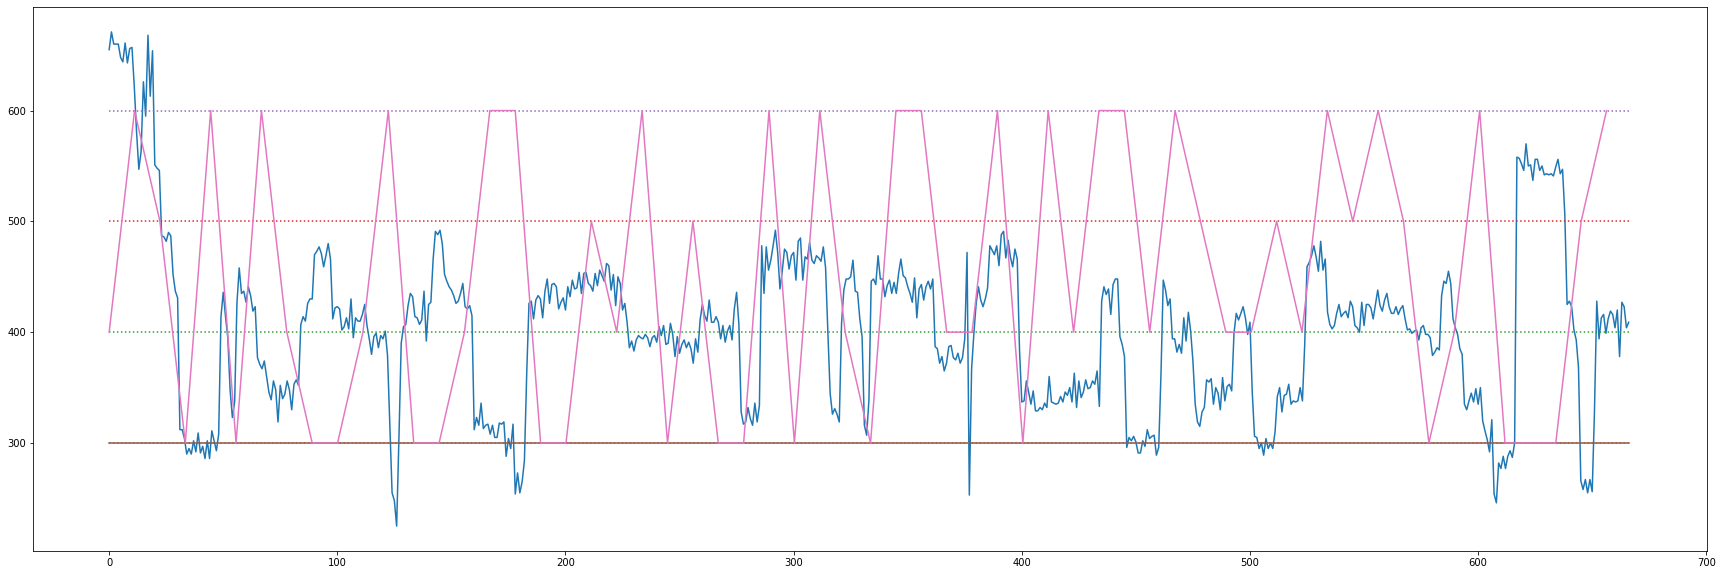

In [44]:
def plotTo(i):
    plt.figure(figsize=(30,10))
    plt.plot(read[1][:i])
    for key in mapper.keys():
        plt.plot([0,i],[mapper[key], mapper[key]], ':')
    plt.plot([300]*i)
    
    points = list(map(lambda x: x*ratio, range(round(i/ratio))))
    plt.plot(points, mD[:len(points)])
    
plotTo(round(60*ratio))

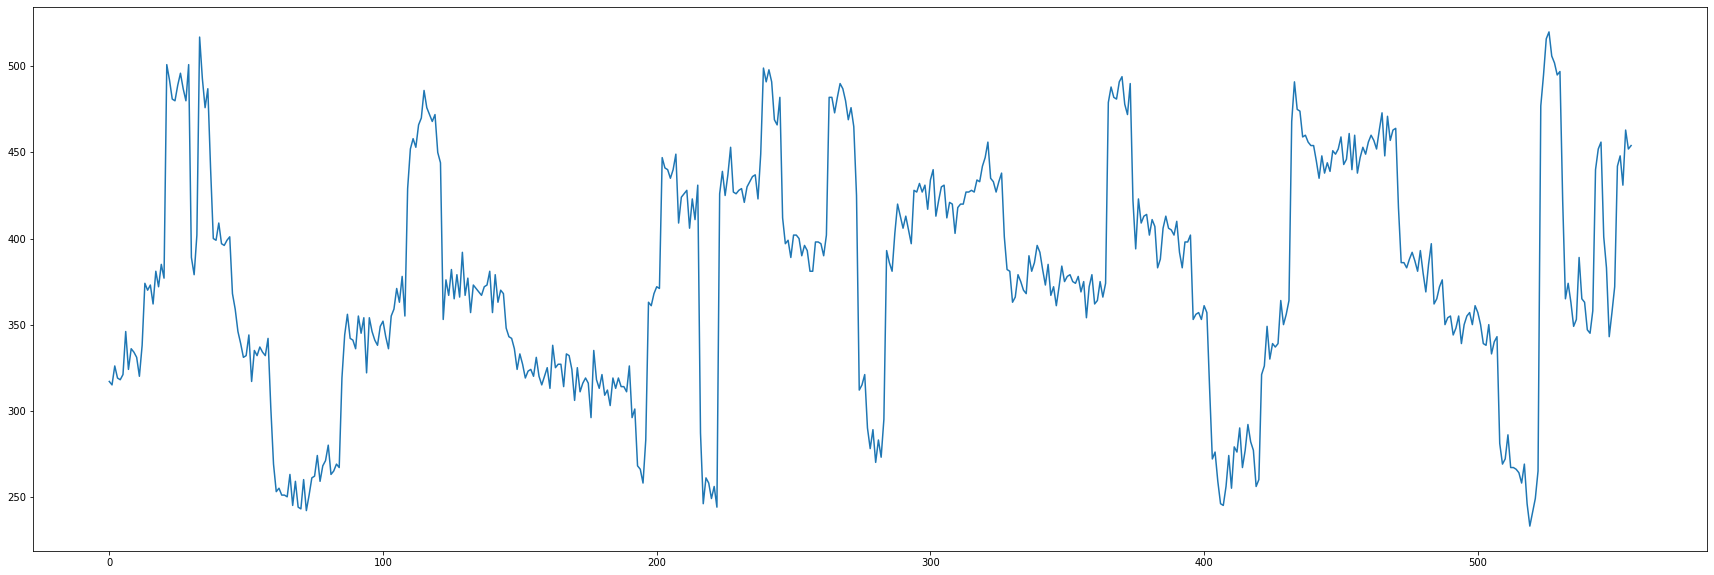

In [39]:
plt.figure(figsize=(30,10))
plt.plot(read[1][round(2650*ratio):round(2700*ratio)])